# Вопросы

### №1 

Почему прямой перебор для поиска оптимума возможен только для одномерных задач?

При полном или частичном переборе с ростом числа переменных экспоненциально растёт число комбинаций, которые необходимо проверять. Это делает прямой перебор неэффективным и практически невозможным для больших размерностей.

### №2 

В чем суть метода Нелдера-Мида?

Метод Нелдера-Мида - это  итерационный алгоритм оптимизации без использования производных. Он основан на идее постепенного изменения исходного симплекса (многогранника) в пространстве переменных до достижения оптимального решения. Движение симплекса к минимуму происходит с помощью 3-х операций: отражения, растяжения и сжатия. 

Суть алгоритма кратко: Изначально инициализируются n+1 точка(симплекс), а также параметры алгоритма: коэффициент растяжения, сжатия и отражения. После этого каждый шаг значения функции в вершинах симплекса сортируются, из них отбираются вершины с наибольшими и наименьшими значениями функции, считается "центр тяжести" точек, как их среднее значение, затем при определенных условиях значения точек изменяются по определенным формулам(кажется. что нет смысла их выписывать). Алгоритм продолжается до критерия останова: например по достижению заранее заданного числа итерация или сравнения некой метрики близости вершин полученного на данной итерации симплекса с желаемой. 

Метод Нелдера-Мида является глобальным алгоритмом оптимизации, который может быть эффективным для негладких, мультимодальных функций. Однако он может иметь проблемы с сходимостью в некоторых случаях и может потребовать большого числа итераций для достижения оптимального решения.



### №4

Всегда ли градиентные методы достигают глобального минимума? Какие есть способы обхода локальных минимумов и как проверить, что минимум глобальный?

Не всегда. Зачастую бывает так, что функция имеет много локальных минимумов, и точка, где алгоритм сойдется может оказаться как раз локальным, а не глобальным минимумом. Успех градиентных методов зависит от точки старта алгоритма.

Бороться с такими особенностями функций можно разными способами:
1. SGD и вариации. После определенного кол-ва шагов коэффициенты меняются случайным образом, что позволет "выпрыгивать" из локальных минимумов. 
2. Добавления функции накопления импульса. В больших "оврагах" функции градиент большой, а обычный градиентный спуск не "запоминает" предыдущие значения градиента и смотрит только на текущие. Этот метод позволяет уменьшать скорость обучения алгоритма в зависимости от значения градиента, чтобы динамически регулировать шаг алгоритма в зависимости от ландшафта функции.

Проверить, что минимум глобальный можно, к примеру, найдя минимум функции аналитически(на бумаге). Или воспользоваться более совершенным алгоритмом оптимизации и сравнить результаты. Или запустить его из разных точек и чем охотнее алгоритм будет сходиться в одну точку, тем вероятнее, что она является глобальным минимумом.

# Задачи

In [1]:
from scipy import optimize 
import numpy as np
import matplotlib.pyplot as plt

### №1

Сгенерируйте данные с помощью функции cos(30*x) + sin(10*x) + 0.3x**2
  и гаусса с отклонением 0.2 и найдите глобальный минимум, реализовав какой-нибудь алгоритм самостоятельно. Так как это одномерная задача, то можно получить точный минимум, сравните вашу оценку с "реальным" минимумом.

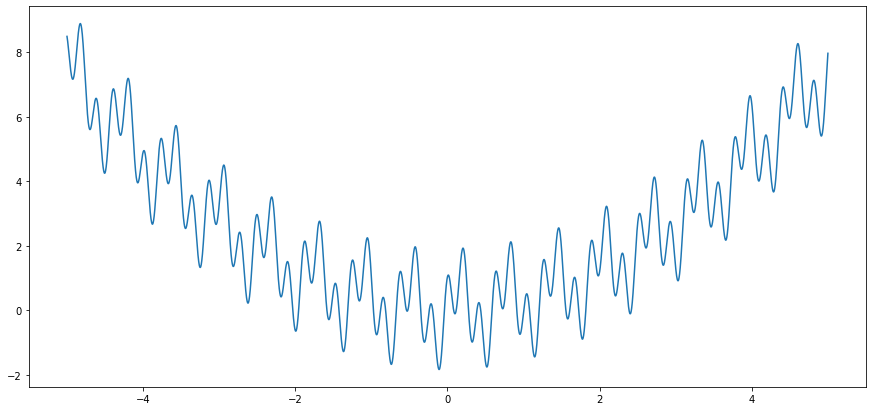

In [2]:
def f(x: float):
    return np.cos(30*x) + np.sin(10*x) + 0.3*x**2  + np.random.normal(loc=0, scale=0.2)

x = np.linspace(-5, 5, 10000)
y = f(x)
plt.figure(figsize= (15, 7))
plt.plot(x, y)

In [3]:
# реальный минимум такой функции можно найти например перебором


### №2

Возьмите любую функцию из списка, кроме функций Розенброка и сферы, и попытайтесь глобальный минимум, использовав любых 3 алгоритма, можно использовать scipy.optimize. Сравните результаты.

In [4]:
def beales(x: np.array):
    """
    Global minimum in f (3.0, 0.5)=0
    """
    return (1.5 - x[0] +x[0]*x[1])**2 + (2.25 - x[0] +x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

exact = np.array([3.0, 0.5])
methods = ['Nelder-Mead', 'SLSQP', 'BFGS']

def get_results(x0: np.array):
    for method in methods:
        res = optimize.minimize(beales, x0, method=method)
        print("="*50, method, "="*50)
        print("Found min:", res["x"])
        print("Function value:", res["fun"])
        print("euclidean distance:",  np.sqrt(np.sum((res["x"] - exact)**2)))
    

In [5]:
# close to real min
get_results(x0 = np.array([3.2, 0.6]))
# Top:
# 1. BFGS
# 2. Nelder-Mead
# 3. SLSQP(значительно хуже)

================================================== Nelder-Mead ==================================================
Found min: [3.00003817 0.50000863]
Function value: 2.494945856048052e-10
euclidean distance: 3.9134933198138205e-05
================================================== SLSQP ==================================================
Found min: [3.00139452 0.500372  ]
Function value: 3.2689196515861567e-07
euclidean distance: 0.001443281988100778
================================================== BFGS ==================================================
Found min: [2.99999863 0.49999962]
Function value: 3.471130282188317e-13
euclidean distance: 1.4222050938998243e-06


In [6]:
# mid distance to real min
get_results(x0 = np.array([6.0, -0.6]))
# Top:
# 1. BFGS
# 2. Nelder-Mead
# 3. SLSQP(так же не очень)

================================================== Nelder-Mead ==================================================
Found min: [3.00004388 0.5000118 ]
Function value: 3.27645673272368e-10
euclidean distance: 4.543728658423694e-05
================================================== SLSQP ==================================================
Found min: [2.99958862 0.49990677]
Function value: 2.8885147926635606e-08
euclidean distance: 0.00042181334355803076
================================================== BFGS ==================================================
Found min: [2.99999928 0.49999989]
Function value: 1.8973281776619008e-13
euclidean distance: 7.322251532596378e-07


In [7]:
# realy far away
get_results(x0 = np.array([15.0, -15.0]))
# Top:
# 1. BFGS
# 2. Nelder-Mead
# 3. SLSQP(очень плохо)

================================================== Nelder-Mead ==================================================
Found min: [2.99999933 0.50000288]
Function value: 2.1425124417273677e-10
euclidean distance: 2.9582088474340073e-06
================================================== SLSQP ==================================================
Found min: [28.62224213  0.96424486]
Function value: 0.3980363131238499
euclidean distance: 25.62644757003906
================================================== BFGS ==================================================
Found min: [2.99999955 0.49999974]
Function value: 5.710353271534072e-13
euclidean distance: 5.195045422130707e-07


### №3

In [12]:
# Генерация данных
np.random.seed(0)
n = 200
x = np.linspace(-1, 1, n)
# задаём полином 5-й степени
y_true = 9*x**5 - 2*x**4 - 5*x**3 + 10*x**2 + 4*x + 2 
y_noise = np.random.normal(loc=0, scale=1.0, size=n)
y = y_true + y_noise
errors = []

# Функция для минимизации с использованием метода наименьших квадратов
def least_squares(params):
    # ищем решение в полиномах 2-й степени
    a, b, c, d = params
    y_pred = a * x**3 + b * x**2 + c*x + d
    error = np.sum((y_pred - y)**2)
    errors.append(error)
    return error

# Использование метода Нелдера-Мида для оптимизации(симплекс)
initial_guess = [1, 1, 1, 1]
symplex = optimize.minimize(least_squares, initial_guess, method='Nelder-Mead')
errors_symplex = errors
errors = []
# sgd = optimize.minimize(least_squares, initial_guess, sgd')
sgd_errors = errors

# Вывод результатов
print("Symplex params", symplex.x)


Symplex params [4.04578944 8.35440437 2.35942772 2.216885  ]


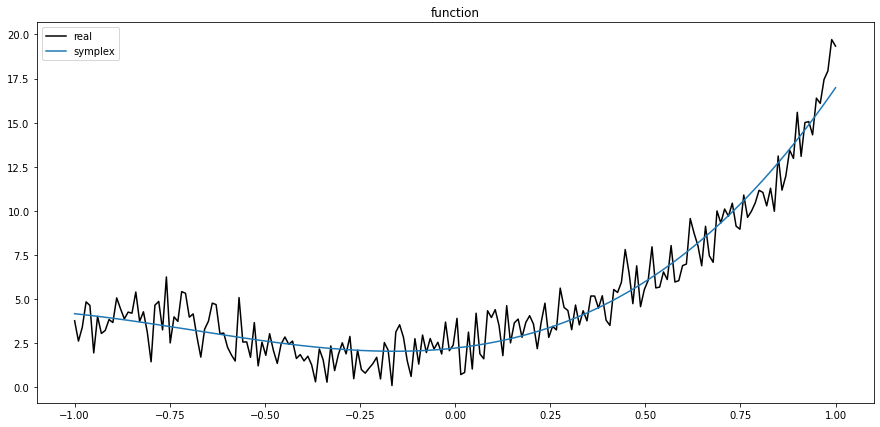

In [13]:
plt.figure(figsize= (15, 7))
plt.plot(x, y, label = "real", color = "black")
plt.plot(x, symplex.x[0]*x**3 + symplex.x[1]*x**2 + symplex.x[2]*x + symplex.x[3], label = "symplex")
plt.title("function")
plt.legend()
plt.show()


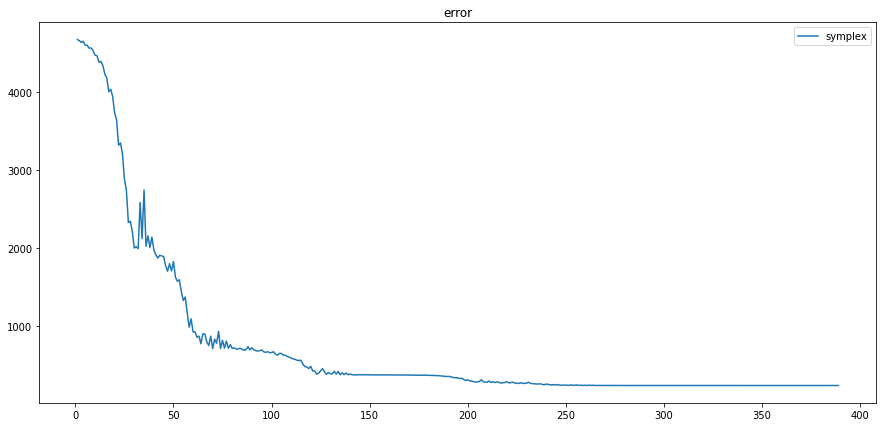

In [14]:
plt.figure(figsize= (15, 7))
plt.plot(range(1, len(errors_symplex) + 1), errors_symplex, label = "symplex")

plt.title("error")
plt.legend()
plt.show()